Heart Disease Prediction

About Dataset

LOGISTIC REGRESSION - HEART DISEASE PREDICTION

Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("train.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,40,4.0,1,30.0,0.0,0,0,0,205.0,131.0,81.0,23.74,66.0,87.0,0
1,0,57,2.0,0,0.0,0.0,0,1,0,250.0,152.5,92.5,32.31,75.0,94.0,0
2,0,47,1.0,0,0.0,0.0,0,0,0,230.0,123.0,71.0,26.98,83.0,73.0,0
3,1,41,2.0,1,30.0,0.0,0,0,0,228.0,113.0,82.5,25.67,67.0,70.0,0
4,0,64,1.0,0,0.0,0.0,0,1,0,232.0,149.5,84.0,20.49,68.0,96.0,0


In [11]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
df.isnull().sum()

male                 0
age                  0
education           88
currentSmoker        0
cigsPerDay          24
BPMeds              48
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             42
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            314
TenYearCHD           0
dtype: int64

In [14]:
df.shape

(3390, 16)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(2909, 16)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(2909, 16)

In [20]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [21]:
counts = df['TenYearCHD'].value_counts()
percentages = df['TenYearCHD'].value_counts(normalize=True) * 100
result = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
print(result)


            Count  Percentage
TenYearCHD                   
0            2457       84.46
1             452       15.54


Data Analysis

In [22]:
data = df.copy()

In [27]:
%matplotlib inline

def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))

    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, color="skyblue")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], color="lightgreen")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()
    print("Plots displayed successfully")


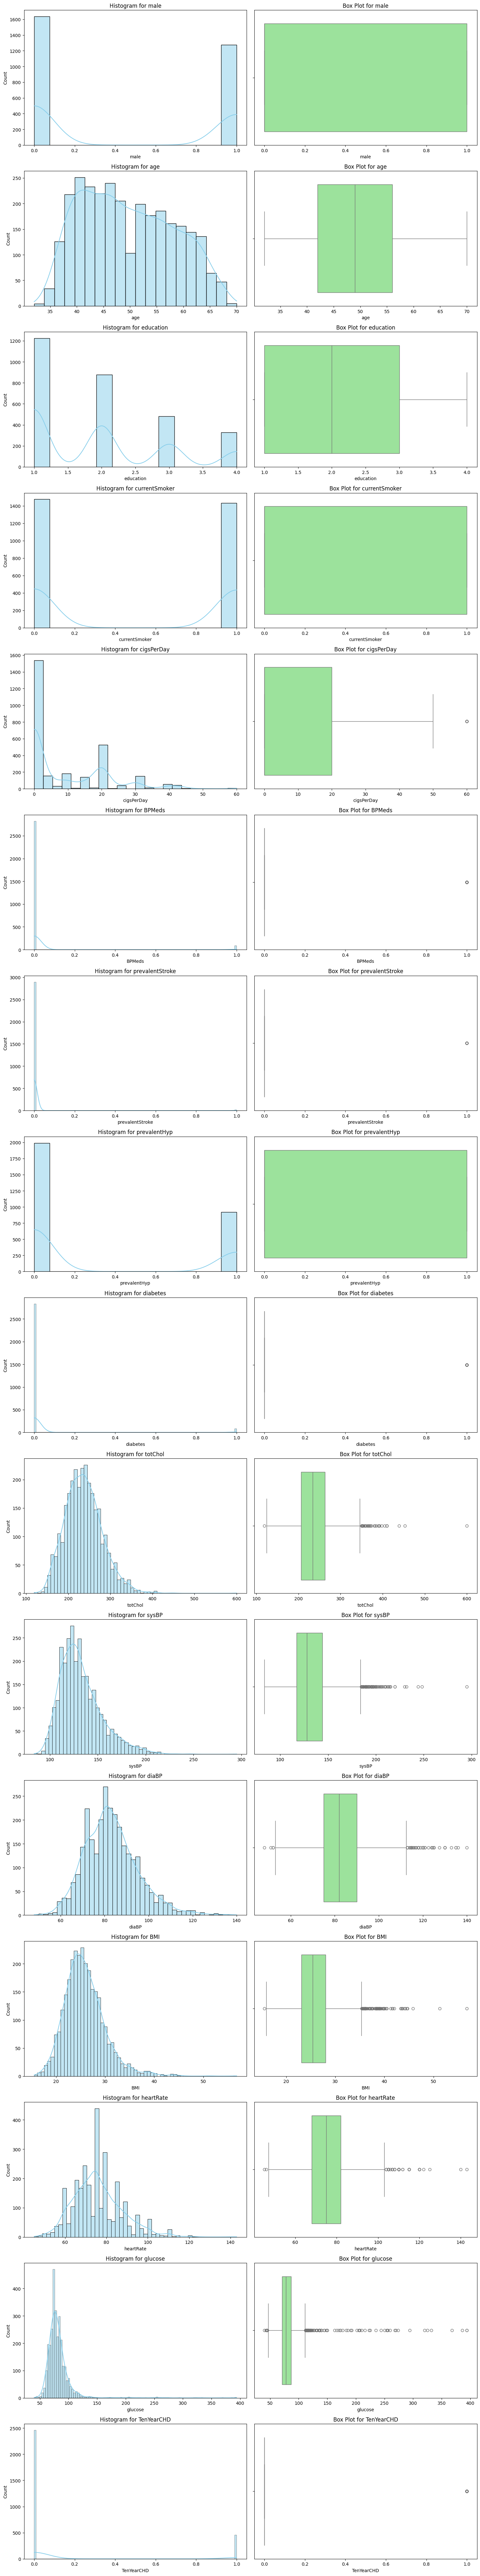

Plots displayed successfully


In [28]:
num_features = df.select_dtypes(include=['number']).columns.tolist()
num_plot_dist(df, num_features)


Data Processing

In [30]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,40,4.0,1,30.0,0.0,0,0,0,205.0,131.0,81.0,23.74,66.0,87.0,0
1,0,57,2.0,0,0.0,0.0,0,1,0,250.0,152.5,92.5,32.31,75.0,94.0,0
2,0,47,1.0,0,0.0,0.0,0,0,0,230.0,123.0,71.0,26.98,83.0,73.0,0
3,1,41,2.0,1,30.0,0.0,0,0,0,228.0,113.0,82.5,25.67,67.0,70.0,0
4,0,64,1.0,0,0.0,0.0,0,1,0,232.0,149.5,84.0,20.49,68.0,96.0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2909 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2909 non-null   int64  
 1   age              2909 non-null   int64  
 2   education        2909 non-null   float64
 3   currentSmoker    2909 non-null   int64  
 4   cigsPerDay       2909 non-null   float64
 5   BPMeds           2909 non-null   float64
 6   prevalentStroke  2909 non-null   int64  
 7   prevalentHyp     2909 non-null   int64  
 8   diabetes         2909 non-null   int64  
 9   totChol          2909 non-null   float64
 10  sysBP            2909 non-null   float64
 11  diaBP            2909 non-null   float64
 12  BMI              2909 non-null   float64
 13  heartRate        2909 non-null   float64
 14  glucose          2909 non-null   float64
 15  TenYearCHD       2909 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 386.4 KB


In [33]:
#### Multicollinearity

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [35]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [36]:
vif_data

,feature,VIF
0,const,197.048007
1,male,1.218805
2,age,1.396372
3,education,1.055259
4,currentSmoker,2.566412
5,cigsPerDay,2.720708
6,BPMeds,1.109039
7,prevalentStroke,1.013889
8,prevalentHyp,2.021855
9,diabetes,1.663258


In [37]:
#### Our data doesnt have Multicollinearity

<Axes: >

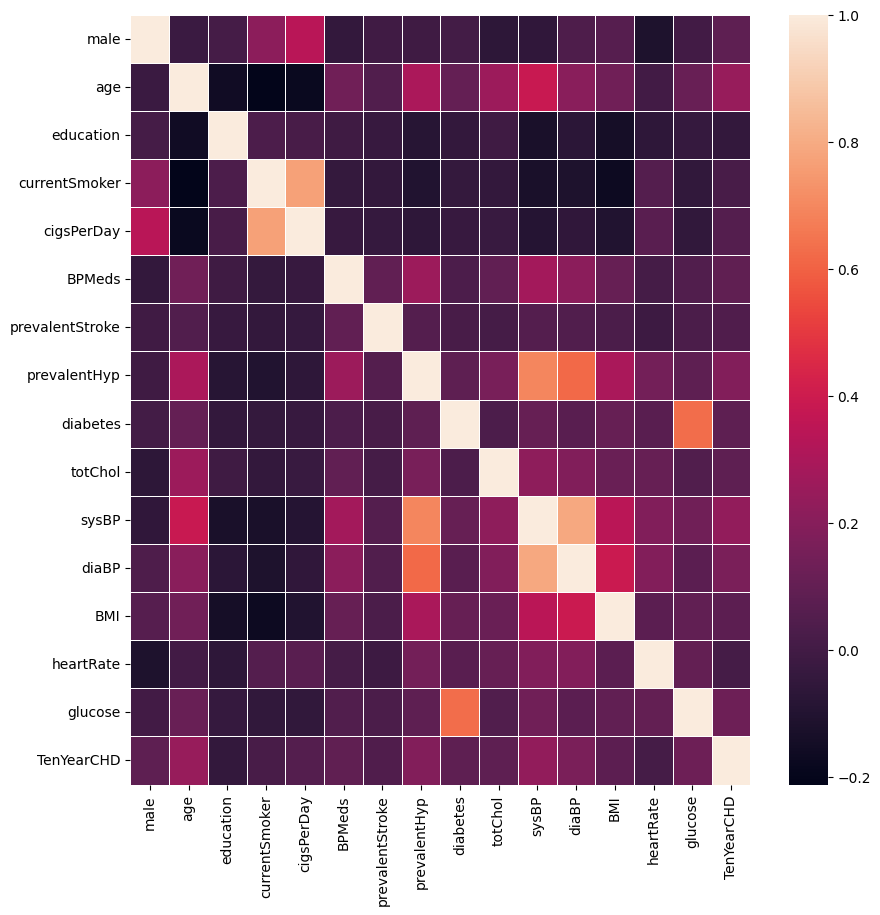

In [39]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [40]:
#### Skewness

In [41]:
skewness  = df.skew()

In [42]:
skewness

male                0.250258
age                 0.248114
education           0.699819
currentSmoker       0.028206
cigsPerDay          1.212015
BPMeds              5.488084
prevalentStroke    12.972936
prevalentHyp        0.794085
diabetes            5.902740
totChol             0.686756
sysBP               1.171740
diaBP               0.669390
BMI                 1.073032
heartRate           0.687113
glucose             6.308159
TenYearCHD          1.903560
dtype: float64

In [43]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [44]:
#### Imablanced Data

In [45]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    2457
1     452
Name: count, dtype: int64

In [46]:
X = df.drop(columns='TenYearCHD')
y = df["TenYearCHD"]

In [47]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [48]:
y.value_counts()

TenYearCHD
0    2457
1     452
Name: count, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [51]:
y_res

0       0
1       0
2       0
3       0
4       0
       ..
4909    1
4910    1
4911    1
4912    1
4913    1
Name: TenYearCHD, Length: 4914, dtype: int64

In [52]:
y_res.value_counts()

TenYearCHD
0    2457
1    2457
Name: count, dtype: int64

In [53]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["TenYearCHD"] = y_res

In [54]:
balanced_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,40,4.0,1,30.0,0.0,0.0,0,0.0,205.0,131.0,81.0,23.74,66.0,4.477337,0
1,0,57,2.0,0,0.0,0.0,0.0,1,0.0,250.0,152.5,92.5,32.31,75.0,4.553877,0
2,0,47,1.0,0,0.0,0.0,0.0,0,0.0,230.0,123.0,71.0,26.98,83.0,4.304065,0
3,1,41,2.0,1,30.0,0.0,0.0,0,0.0,228.0,113.0,82.5,25.67,67.0,4.262680,0
4,0,64,1.0,0,0.0,0.0,0.0,1,0.0,232.0,149.5,84.0,20.49,68.0,4.574711,0


In [55]:
balanced_df.shape

(4914, 16)

In [56]:
df = balanced_df.copy()

In [57]:
df.shape

(4914, 16)

In [58]:
#### Feature Selection

In [59]:
len(df.columns)

16

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
X = df.drop(columns='TenYearCHD')
y = df["TenYearCHD"]

In [62]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [63]:
feature_importance = model.feature_importances_

In [64]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [65]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [67]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["TenYearCHD"]]

In [68]:
top_10_df.head()

,education,age,sysBP,totChol,diaBP,glucose,heartRate,BMI,cigsPerDay,diabetes,TenYearCHD
0,4.0,40,131.0,205.0,81.0,4.477337,66.0,23.74,30.0,0.0,0
1,2.0,57,152.5,250.0,92.5,4.553877,75.0,32.31,0.0,0.0,0
2,1.0,47,123.0,230.0,71.0,4.304065,83.0,26.98,0.0,0.0,0
3,2.0,41,113.0,228.0,82.5,4.262680,67.0,25.67,30.0,0.0,0
4,1.0,64,149.5,232.0,84.0,4.574711,68.0,20.49,0.0,0.0,0


In [69]:
len(top_10_df.columns)

11

In [70]:
df = top_10_df.copy()

Model Selection

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [72]:
X = df.drop(columns='TenYearCHD')
y = df["TenYearCHD"]

In [73]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [74]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [75]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [76]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 1975, number of negative: 1956
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2131
[LightGBM] [Info] Number of data points in the train set: 3931, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502417 -> initscore=0.009667
[LightGBM] [Info] Start training from score 0.009667


In [77]:
metrics_df= pd.DataFrame(metrics)

In [78]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.907426,0.913319,0.896266,0.904712
1,LogisticRegression,0.645982,0.633466,0.659751,0.646341
2,Gradient Boosting,0.838250,0.878220,0.778008,0.825083
3,Suuport vector classifier,0.672431,0.651515,0.713693,0.681188
4,Decsion Tree,0.832146,0.805395,0.867220,0.835165
5,KNN,0.802645,0.727848,0.954357,0.825853
6,Naive Bayes,0.658189,0.702778,0.524896,0.600950
7,XGboost,0.880977,0.895879,0.856846,0.875928
8,Adaboost,0.784334,0.783613,0.773859,0.778706
9,LGBM,0.881994,0.917808,0.834025,0.873913


In [79]:
##### TRAIN OUR RF MODEL

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [81]:
X = df.drop(columns='TenYearCHD')
y = df["TenYearCHD"]

In [82]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [83]:
rf = RandomForestClassifier(random_state=42)

In [84]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [85]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [86]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.2s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C0A94FFA40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C0A8BD0F20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C0AC47DD90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C0A94FD6D0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [87]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [88]:
best_rf_model = random_search.best_estimator_

In [89]:
y_pred = best_rf_model.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [91]:
accuracy

0.8952187182095626

In [92]:
precision

0.9183222958057395

In [93]:
recall

0.8630705394190872

In [94]:
f1

0.8898395721925134

In [95]:
### Save this model

In [96]:
import joblib

In [97]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [98]:
loaded_model=joblib.load("random_forest.pkl")

In [99]:
X_train[0:1]

,education,age,sysBP,totChol,diaBP,glucose,heartRate,BMI,cigsPerDay,diabetes
3435,1.0,45,137.180375,230.813131,93.481963,4.349136,112.590187,31.820534,0.0,0.0


In [100]:
new_data = np.array([1.0 , 45	, 137.180375 ,	230.813131 ,	93.481963 ,	4.349136 ,	112.590187 ,	31.820534 ,	0.0 ,	0.0
]).reshape(1,-1)

In [101]:
predictions=loaded_model.predict(new_data)

In [102]:
predictions

array([1])